In [13]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans, SpectralClustering
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
# Pour avoir un plot 3D interactif
%matplotlib widget

In [14]:
files = [
    '../data/data_limagrain_2024/OSR BN51776 lot1.xlsx',
    '../data/data_limagrain_2024/OSR lot 2.xlsx',
    '../data/data_limagrain_2024/OSR Lot 3.xlsx',
    '../data/data_limagrain_2024/OSR lot 4.xlsx'
]

In [15]:
df_list = []
for f in files:
    df_list.append(pd.read_excel(f))

In [16]:
df = pd.concat(df_list)
df = df.iloc[:,12:] #remove ['SeedNr', 'TrayNr', 'RowNr', 'ColNr', 'Sorted', 'AI score 0',
                    #, 'AI score 1', 'AI score 2', AI score 3', 'AI score 4', 'AI score 5']
df.drop(columns=['Vigor', 'GermData'], inplace=True) # only NaNs

In [17]:
df.shape

(7071, 247)

In [18]:
df.dropna(inplace=True)
df.shape

(6281, 247)

In [19]:
df.head()

,X_Ray_Size,Absorption,Size,VIS_Major,VIS_Minor,VIS_LShape,VIS_Perimeter,VIS_HullArea,VIS_HullPeri,VIS_Convexity,...,HYPVIS_973.5nm,HYPVIS_976.2nm,HYPVIS_978.9nm,HYPVIS_981.6nm,HYPVIS_984.2nm,HYPVIS_986.9nm,HYPVIS_989.6nm,HYPVIS_992.3nm,HYPVIS_995.0nm,HYPVIS_997.6nm
0,22382,193.083371,14435.0,72.471786,63.523962,1.140857,525.286363,14793.0,456.336294,0.975799,...,16.933333,17.133333,17.233333,17.433333,17.633333,17.700000,17.900000,17.966667,18.166667,17.900000
1,13663,157.264144,9502.0,56.774701,53.406151,1.063074,431.445743,9693.5,359.781951,0.980244,...,16.588235,16.941176,16.823529,17.294118,17.176471,17.058824,17.176471,17.294118,18.000000,18.000000
2,14604,150.802383,9918.0,56.692746,55.831015,1.015435,446.558441,10130.0,376.713360,0.979072,...,16.142857,16.500000,16.428571,16.928571,16.857143,16.785714,16.928571,17.357143,17.285714,17.428571
3,19689,182.584590,15288.0,70.856065,68.920777,1.028080,685.553391,15993.0,455.783473,0.955918,...,16.548387,16.806452,16.806452,16.838710,17.225806,17.290323,17.741935,17.548387,17.838710,17.645161
4,18064,174.370571,12157.0,67.482098,57.558000,1.172419,590.641702,12840.5,421.002042,0.946770,...,20.586207,20.689655,20.724138,21.103448,21.413793,21.482759,21.931034,22.172414,22.275862,22.379310


In [79]:
df.columns[:22]

Index(['X_Ray_Size', 'Absorption', 'Size', 'VIS_Major', 'VIS_Minor',
       'VIS_LShape', 'VIS_Perimeter', 'VIS_HullArea', 'VIS_HullPeri',
       'VIS_Convexity', 'VIS_FeretMax', 'VIS_FeretMin', 'VIS_FShape', 'AvgL',
       'AvgA', 'AvgB', 'CF_Size', 'CF_Avg', 'HSV_Size', 'HSV_Width',
       'HSV_Height', 'HSV_MaxVal'],
      dtype='object')

In [44]:
scaler = preprocessing.StandardScaler()
df_scaled = scaler.fit_transform(df)
#df_scaled = scaler.fit_transform(df.iloc[:,:22])
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled[:5]

,X_Ray_Size,Absorption,Size,VIS_Major,VIS_Minor,VIS_LShape,VIS_Perimeter,VIS_HullArea,VIS_HullPeri,VIS_Convexity,...,HYPVIS_973.5nm,HYPVIS_976.2nm,HYPVIS_978.9nm,HYPVIS_981.6nm,HYPVIS_984.2nm,HYPVIS_986.9nm,HYPVIS_989.6nm,HYPVIS_992.3nm,HYPVIS_995.0nm,HYPVIS_997.6nm
0,0.847400,1.334885,0.629554,0.704193,0.533995,-0.027629,0.139982,0.602066,0.726000,0.131972,...,-1.221111,-1.213508,-1.216395,-1.206998,-1.200635,-1.207868,-1.204348,-1.209475,-1.206663,-1.238703
1,-0.799335,0.153359,-0.740110,-0.876433,-0.503049,-0.198627,-0.642384,-0.732849,-0.734909,0.194602,...,-1.263257,-1.236693,-1.265273,-1.223444,-1.254007,-1.281977,-1.287089,-1.285581,-1.225365,-1.227552
2,-0.621611,-0.059787,-0.624607,-0.884685,-0.254508,-0.303357,-0.516387,-0.618585,-0.478729,0.178083,...,-1.317651,-1.289923,-1.312381,-1.266628,-1.291312,-1.313544,-1.315438,-1.278449,-1.305517,-1.291275
3,0.338780,0.988575,0.866392,0.541497,1.087152,-0.275558,1.476156,0.916195,0.717636,-0.148146,...,-1.268124,-1.252948,-1.267310,-1.277243,-1.248243,-1.255220,-1.222424,-1.256808,-1.243464,-1.267122
4,0.031870,0.717629,-0.002941,0.201754,-0.077497,0.041756,0.684861,0.090953,0.191378,-0.277041,...,-0.774990,-0.784423,-0.800041,-0.773429,-0.758991,-0.770646,-0.743370,-0.733550,-0.745563,-0.739186


## PCA to reduce dimmensionality to 50

In [22]:
pca = PCA()
pca.fit(df_scaled)
new_feats = pca.transform(df_scaled)

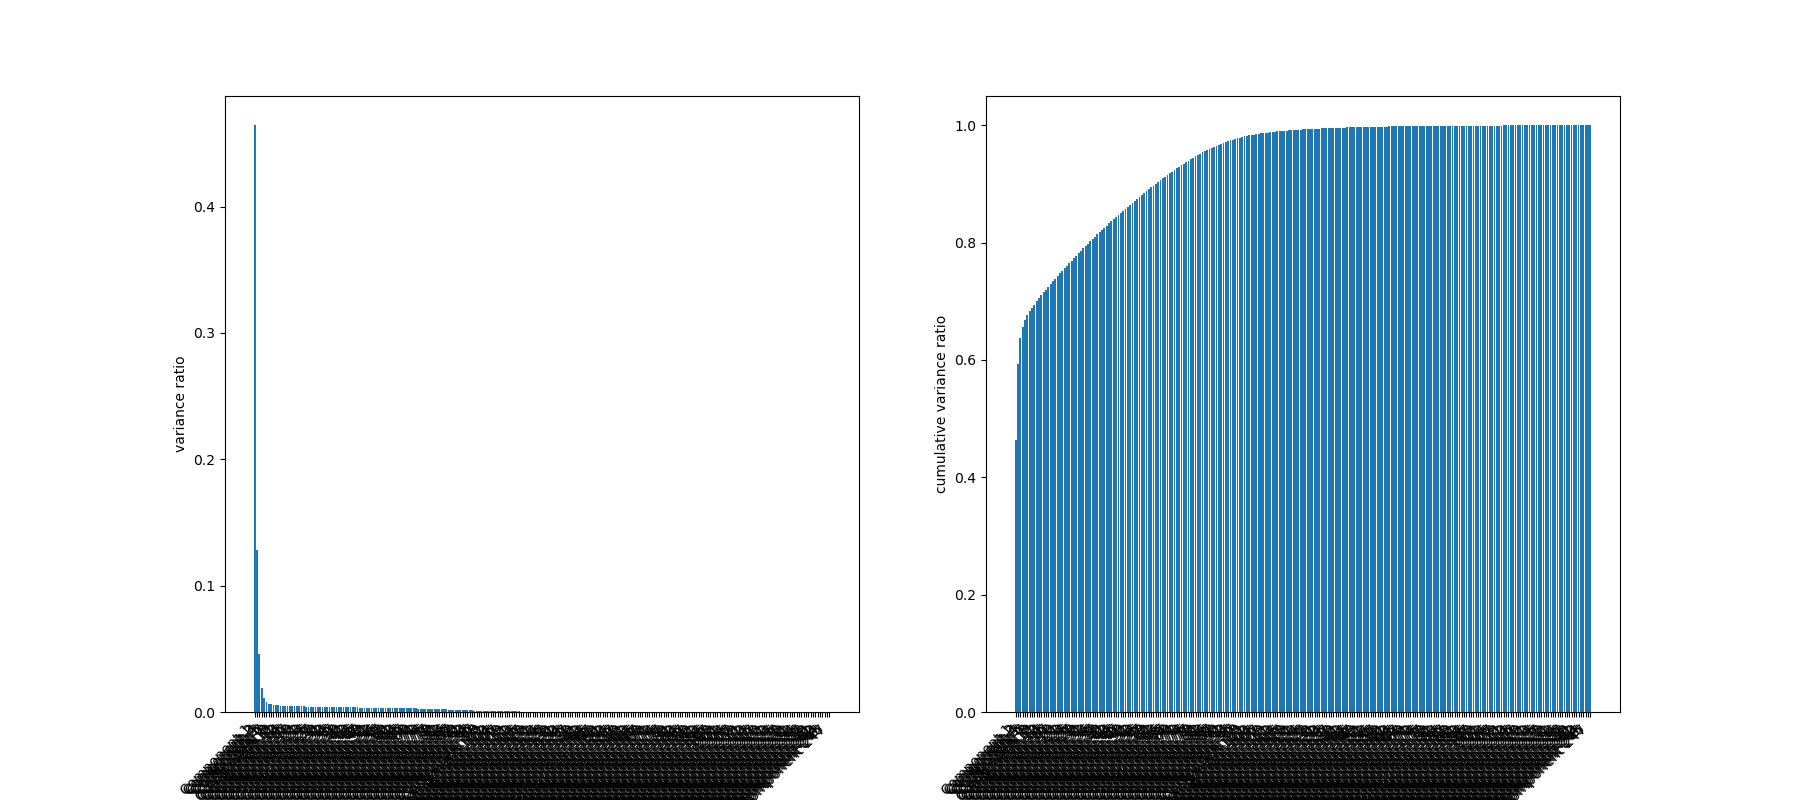

In [23]:
plt.figure(figsize=(18,8))

plt.subplot(1 ,2, 1)
var_ratio = pca.explained_variance_ratio_
plt.bar( range(len(var_ratio)), var_ratio )
plt.ylabel('variance ratio')
ticks = plt.xticks(ticks=[i for i in range(len(var_ratio))],
           labels=['Component {}'.format(i+1) for i in range(len(var_ratio))], rotation=45, ha='right')

plt.subplot(1 ,2, 2)
plt.bar( range(len(var_ratio)), np.cumsum(var_ratio) )
plt.ylabel('cumulative variance ratio')
ticks = plt.xticks(ticks=[i for i in range(len(var_ratio))],
           labels=['Component {}'.format(i+1) for i in range(len(var_ratio))], rotation=45, ha='right')

In [24]:
df_reduced = new_feats[:, :50]

## TSNE
Tips: https://lvdmaaten.github.io/tsne/

In [25]:
tsne = TSNE(n_components=3, perplexity=50)
X_embedded = tsne.fit_transform(df_reduced)
#X_embedded = tsne.fit_transform(df_scaled)

Text(0, 0.5, 'Variable 2')

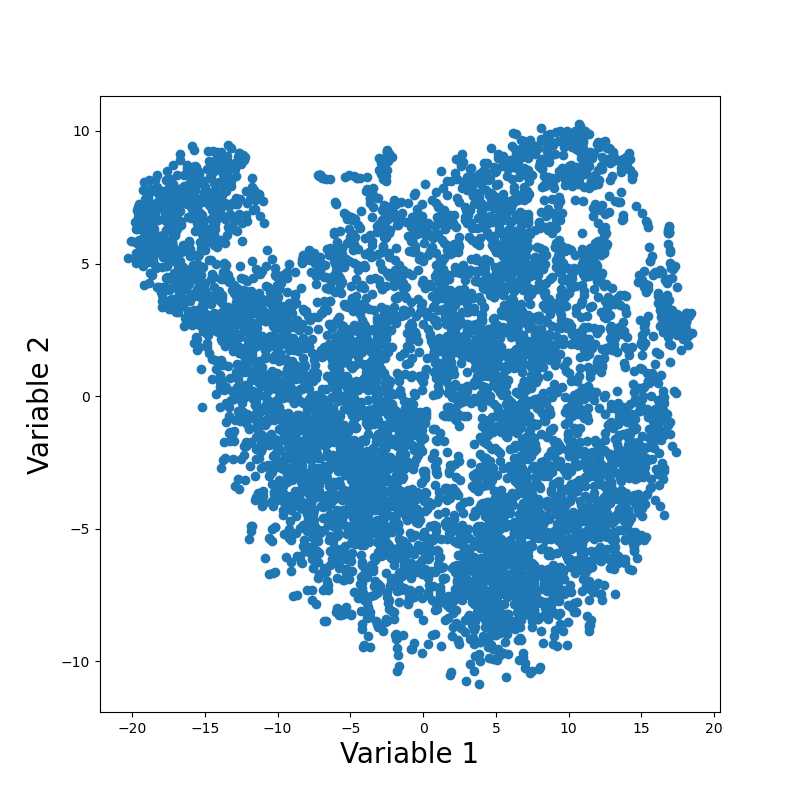

In [26]:
plt.figure(figsize=(8,8))
plt.scatter(X_embedded[:,0], X_embedded[:,1])
plt.xlabel('Variable 1', fontsize=20)
plt.ylabel('Variable 2', fontsize=20)
#plt.legend()
#plt.savefig('/home/thmegy/Documents/reports/Images/limagrain/tsne_fertile_sterile.png')

Text(0, 0.5, 'Variable 2')

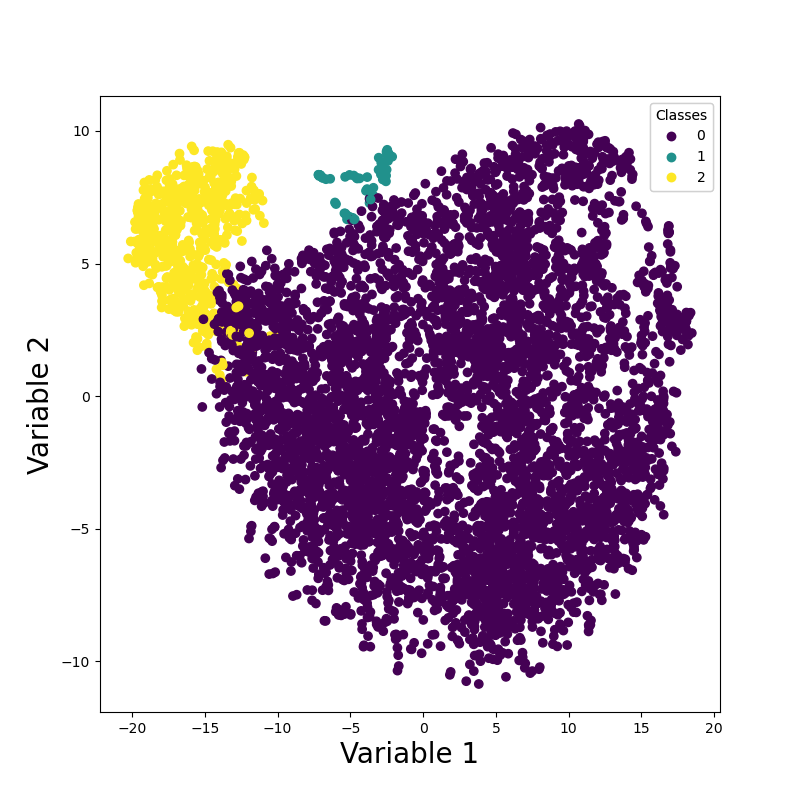

In [30]:
#clustering = DBSCAN(eps=2, min_samples=10).fit(X_embedded)
#clustering = KMeans(n_clusters=3).fit(X_embedded)
clustering = SpectralClustering(n_clusters=3,
        assign_labels='discretize',
        random_state=0).fit(X_embedded)

fig, ax = plt.subplots(figsize=(8,8))
scatter = ax.scatter(X_embedded[:,0], X_embedded[:,1], c=clustering.labels_)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
ax.set_xlabel('Variable 1', fontsize=20)
ax.set_ylabel('Variable 2', fontsize=20)
#plt.savefig('/home/thmegy/Documents/reports/Images/limagrain/tsne_dbscan.png')

In [31]:
tsne.kl_divergence_

1.5308560132980347

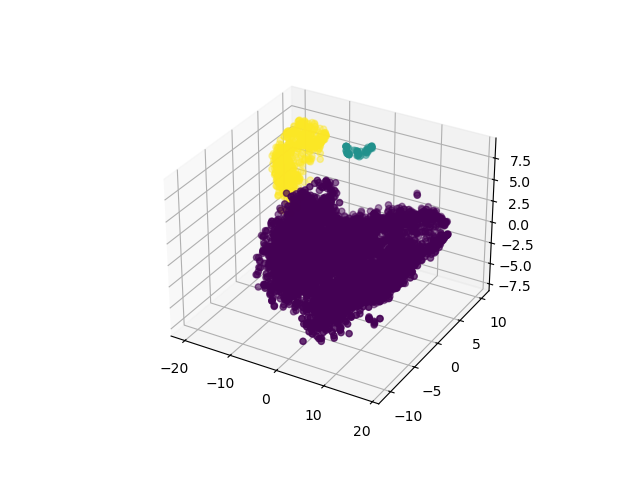

In [32]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_embedded[:,0], X_embedded[:,1], X_embedded[:,2], c=clustering.labels_);

## Cross-check with spectral embbeding and Isomap

Text(0, 0.5, 'Variable 2')

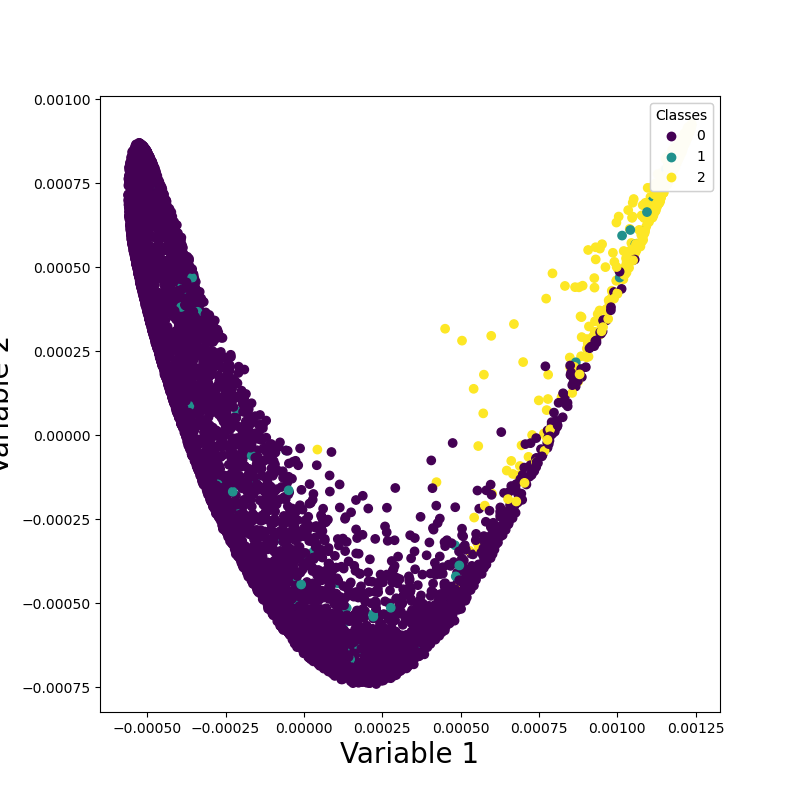

In [35]:
from sklearn.manifold import SpectralEmbedding
embedding = SpectralEmbedding(n_components=3)
X_transformed = embedding.fit_transform(df_scaled)

fig, ax = plt.subplots(figsize=(8,8))
scatter = ax.scatter(X_transformed[:,0], X_transformed[:,1], c=clustering.labels_)
#plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
ax.set_xlabel('Variable 1', fontsize=20)
ax.set_ylabel('Variable 2', fontsize=20)
#plt.savefig('/home/thmegy/Documents/reports/Images/limagrain/spectral_tsne_dbscan.png')

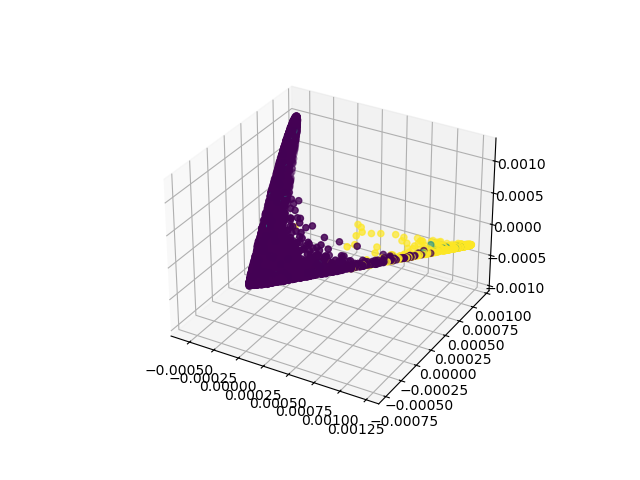

In [36]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_transformed[:,0], X_transformed[:,1], X_transformed[:,2], c=clustering.labels_);

Text(0, 0.5, 'Variable 2')

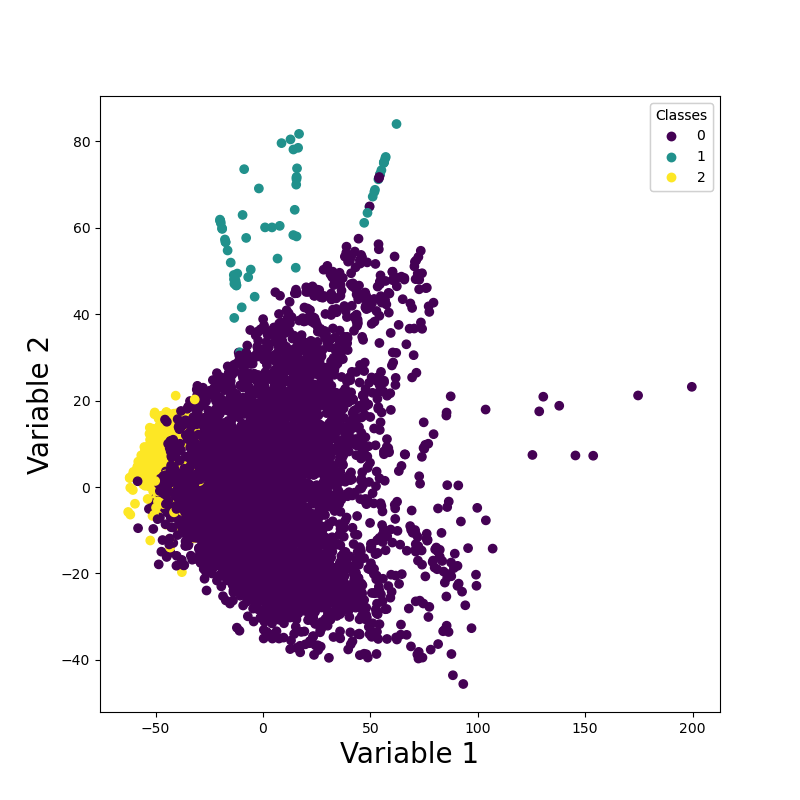

In [37]:
from sklearn.manifold import Isomap
embedding = Isomap(n_components=3)
X_transformed = embedding.fit_transform(df_scaled)

fig, ax = plt.subplots(figsize=(8,8))
scatter = ax.scatter(X_transformed[:,0], X_transformed[:,1], c=clustering.labels_)
#plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
ax.set_xlabel('Variable 1', fontsize=20)
ax.set_ylabel('Variable 2', fontsize=20)
#plt.savefig('/home/thmegy/Documents/reports/Images/limagrain/isomap_tsne_dbscan.png')

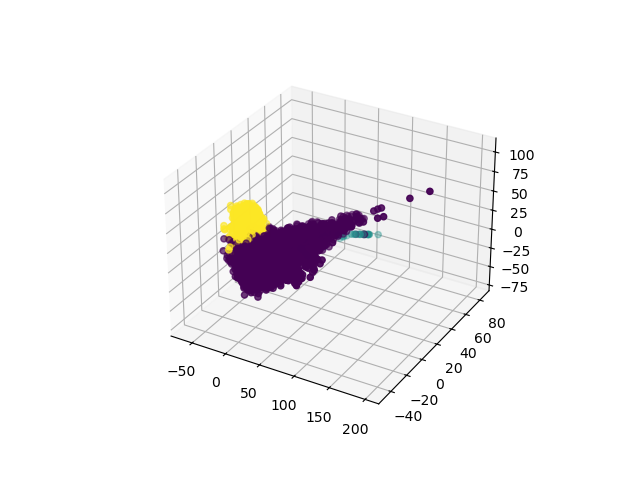

In [38]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_transformed[:,0], X_transformed[:,1], X_transformed[:,2], c=clustering.labels_);

## Explore differences between clusters

In [86]:
diff_cluster_1_vs_0 = (df_scaled[clustering.labels_ == 1].mean() - df_scaled[clustering.labels_ == 0].mean())
diff_cluster_1_vs_0.abs().sort_values()[-30:-1]

HYPVIS_641.2nm    0.650887
HYPVIS_660.0nm    0.651112
HYPVIS_668.0nm    0.653004
HYPVIS_662.6nm    0.654542
HYPVIS_721.6nm    0.658638
HYPVIS_681.4nm    0.658694
HYPVIS_729.6nm    0.662134
HYPVIS_708.2nm    0.662358
HYPVIS_657.3nm    0.669837
HYPVIS_700.2nm    0.672713
HYPVIS_678.7nm    0.676168
HYPVIS_665.3nm    0.681230
HYPVIS_686.8nm    0.690314
HYPVIS_710.9nm    0.697311
HYPVIS_638.5nm    0.706737
HYPVIS_646.6nm    0.715300
VIS_Major         0.747339
HYPVIS_654.6nm    0.749365
AvgB              2.079661
AvgA              2.250896
VIS_FeretMax      2.323783
Size              2.332164
VIS_HullArea      2.651151
VIS_HullPeri      3.098388
VIS_Minor         3.401174
VIS_FeretMin      4.314575
AvgL              4.498933
VIS_FShape        5.107723
VIS_LShape        6.046537
dtype: float64

In [82]:
diff_cluster_2_vs_0 = (df_scaled[clustering.labels_ == 2].mean() -
                       df_scaled[clustering.labels_ == 0].mean())
diff_cluster_2_vs_0.abs().sort_values()

ManualScore       0.000000
VIS_Convexity     0.008879
VIS_LShape        0.047055
VIS_FShape        0.065265
VIS_FeretMax      0.071232
                    ...   
HYPVIS_646.6nm    1.879209
HYPVIS_657.3nm    1.879916
HYPVIS_649.2nm    1.883371
HYPVIS_654.6nm    1.893941
HYPVIS_651.9nm    1.904763
Length: 247, dtype: float64

In [83]:
hypvis_cols = df_scaled.columns[23:].tolist()
hypvis_wavelengths = [float(h[-7:-2]) for h in hypvis_cols]

Text(0, 0.5, 'Cluster 2 - Cluster 0')

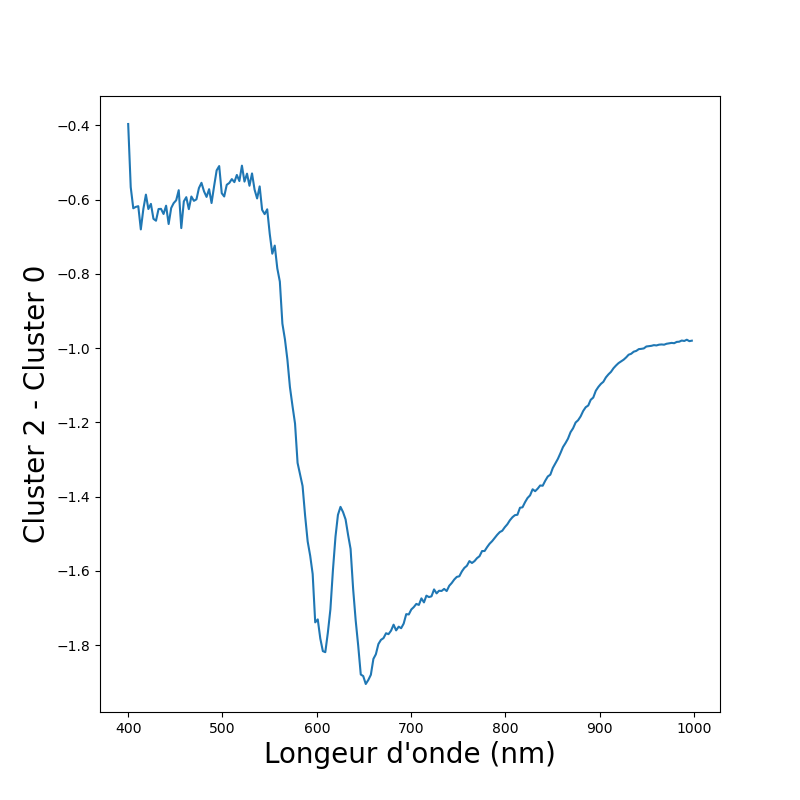

In [88]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(hypvis_wavelengths, diff_cluster_2_vs_0[hypvis_cols])
ax.set_xlabel('Longeur d\'onde (nm)', fontsize=20)
ax.set_ylabel('Cluster 2 - Cluster 0', fontsize=20)
#plt.savefig('/home/thmegy/Documents/reports/Images/limagrain/isomap_tsne_dbscan.png')